In [36]:
#All required libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For handling dates and times
from datetime import datetime, date

# Model building and evaluation libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# For saving and loading models
import joblib

# Optional: To ignore warnings during development
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

Nigeria_weather = pd.read_csv('nigeria_cities_weather_data.csv')
columns_array = Nigeria_weather.columns.to_numpy()
print(columns_array)


All libraries imported successfully!
['country' 'city' 'latitude' 'longitude' 'temp' 'temp_min' 'temp_max'
 'pressure' 'humidity' 'sea_level' 'ground_level' 'wind_speed'
 'wind_degree' 'sunrise' 'sunset' 'timezone' 'cloud' 'description'
 'region' 'population' 'date']


In [38]:
#Create a wind vector feature

# Calculate the wind_vector using wind_speed and wind_direction
Nigeria_weather['wind_vector'] = Nigeria_weather['wind_speed'] * np.cos(np.radians(Nigeria_weather['wind_degree']))

# Display the updated DataFrame
print(Nigeria_weather)



      country        city  latitude  longitude    temp  temp_min  temp_max  \
0          NG       Ankpa      7.38       7.65  311.93    311.93    311.93   
1          NG      Bugana      7.87       7.51  313.10    313.10    313.10   
2          NG       Adoru      7.17       7.04  311.61    311.61    311.61   
3          NG       Ankpa      7.32       7.67  312.75    312.75    312.75   
4          NG      Abocho      7.57       6.99  310.25    310.25    310.25   
...       ...         ...       ...        ...     ...       ...       ...   
22536      NG  Dutsen Wai     10.74       8.24  304.44    304.44    304.44   
22537      NG      Kachia      9.81       8.10  305.01    305.01    305.01   
22538      NG   Kafanchan      9.79       8.19  304.83    304.83    304.83   
22539      NG   Kafanchan      9.75       8.21  304.39    304.39    304.39   
22540      NG   Kafanchan      9.77       8.18  304.68    304.68    304.68   

       pressure  humidity  sea_level  ...  wind_degree         

In [40]:
#create a region_new column
# Define a mapping from states to their respective regions
state_to_region = {
    'Borno': 'North-east',
    'Kaduna': 'North-west',
    'Kogi': 'North-central',
    'Lagos': 'South-west',
    'Rivers': 'South-south',
    'Anambra': 'South-east'
}

Nigeria_weather['region_new'] = Nigeria_weather['region'].map(state_to_region)

# Display the updated DataFrame
print(Nigeria_weather)
Nigeria_weather.head()



      country        city  latitude  longitude    temp  temp_min  temp_max  \
0          NG       Ankpa      7.38       7.65  311.93    311.93    311.93   
1          NG      Bugana      7.87       7.51  313.10    313.10    313.10   
2          NG       Adoru      7.17       7.04  311.61    311.61    311.61   
3          NG       Ankpa      7.32       7.67  312.75    312.75    312.75   
4          NG      Abocho      7.57       6.99  310.25    310.25    310.25   
...       ...         ...       ...        ...     ...       ...       ...   
22536      NG  Dutsen Wai     10.74       8.24  304.44    304.44    304.44   
22537      NG      Kachia      9.81       8.10  305.01    305.01    305.01   
22538      NG   Kafanchan      9.79       8.19  304.83    304.83    304.83   
22539      NG   Kafanchan      9.75       8.21  304.39    304.39    304.39   
22540      NG   Kafanchan      9.77       8.18  304.68    304.68    304.68   

       pressure  humidity  sea_level  ...              sunrise 

,country,city,latitude,longitude,temp,temp_min,temp_max,pressure,humidity,sea_level,...,sunrise,sunset,timezone,cloud,description,region,population,date,wind_vector,region_new
0,NG,Ankpa,7.38,7.65,311.93,311.93,311.93,1006,28,1006,...,2024-02-21 05:45:30,2024-02-21 17:41:02,3600,56,Clouds,Kogi,56362,2024-02-21,0.364777,North-central
1,NG,Bugana,7.87,7.51,313.10,313.10,313.10,1006,29,1006,...,2024-02-21 05:46:26,2024-02-21 17:41:13,3600,46,Clouds,Kogi,11026,2024-02-21,1.523623,North-central
2,NG,Adoru,7.17,7.04,311.61,311.61,311.61,1006,34,1006,...,2024-02-21 05:47:47,2024-02-21 17:43:38,3600,43,Clouds,Kogi,12230,2024-02-21,-1.525758,North-central
3,NG,Ankpa,7.32,7.67,312.75,312.75,312.75,1006,28,1006,...,2024-02-21 05:45:22,2024-02-21 17:41:00,3600,60,Clouds,Kogi,12470,2024-02-21,0.247487,North-central
4,NG,Abocho,7.57,6.99,310.25,310.25,310.25,1006,33,1006,...,2024-02-21 05:48:17,2024-02-21 17:43:31,3600,40,Clouds,Kogi,13261,2024-02-21,-1.266748,North-central


In [42]:
#creating day_length in hours
Nigeria_weather['sunrise'] = pd.to_datetime(Nigeria_weather['sunrise'])
Nigeria_weather['sunset'] = pd.to_datetime(Nigeria_weather['sunset'])

# Calculate day length in hours
Nigeria_weather['day_length'] = (Nigeria_weather['sunset'] - Nigeria_weather['sunrise']).dt.total_seconds() / 3600
# date columns to datetime
Nigeria_weather['date'] = pd.to_datetime(Nigeria_weather['date'])


In [44]:
#create urban_rural column
# Calculate the average population
average_population = Nigeria_weather['population'].mean()

# Classify regions based on average population
Nigeria_weather['urban_rural'] = Nigeria_weather['population'].apply(lambda x: 'Urban' if x > average_population else 'Rural')

# Display the updated DataFrame
print(Nigeria_weather)
# Count the number of urban cities
urban_cities_count = Nigeria_weather[Nigeria_weather['urban_rural'] == 'Urban'].shape[0]

# Display the count
print("Number of urban cities:", urban_cities_count)



      country        city  latitude  longitude    temp  temp_min  temp_max  \
0          NG       Ankpa      7.38       7.65  311.93    311.93    311.93   
1          NG      Bugana      7.87       7.51  313.10    313.10    313.10   
2          NG       Adoru      7.17       7.04  311.61    311.61    311.61   
3          NG       Ankpa      7.32       7.67  312.75    312.75    312.75   
4          NG      Abocho      7.57       6.99  310.25    310.25    310.25   
...       ...         ...       ...        ...     ...       ...       ...   
22536      NG  Dutsen Wai     10.74       8.24  304.44    304.44    304.44   
22537      NG      Kachia      9.81       8.10  305.01    305.01    305.01   
22538      NG   Kafanchan      9.79       8.19  304.83    304.83    304.83   
22539      NG   Kafanchan      9.75       8.21  304.39    304.39    304.39   
22540      NG   Kafanchan      9.77       8.18  304.68    304.68    304.68   

       pressure  humidity  sea_level  ...  timezone  cloud  des

Clean Dataset Shape: (22541, 14)

First 10 Rows:
   latitude  longitude  pressure  wind_speed  wind_degree  cloud  day_length  \
0      7.38       7.65      1006        0.44           34     56   11.925556   
1      7.87       7.51      1006        1.86           35     46   11.913056   
2      7.17       7.04      1006        1.78          211     43   11.930833   
3      7.32       7.67      1006        0.35           45     60   11.927222   
4      7.57       6.99      1006        1.63          219     40   11.920556   
5      6.81       6.64      1006        1.11          136     57   11.940000   
6      7.51       7.31      1006        1.47          225     51   11.921944   
7      8.41       7.00      1006        0.84          214     37   11.899167   
8      7.58       6.18      1006        0.88          233     70   11.920278   
9      7.30       7.34      1006        1.74          236     56   11.927500   

        date urban_rural     region_new description    temp  humidity 

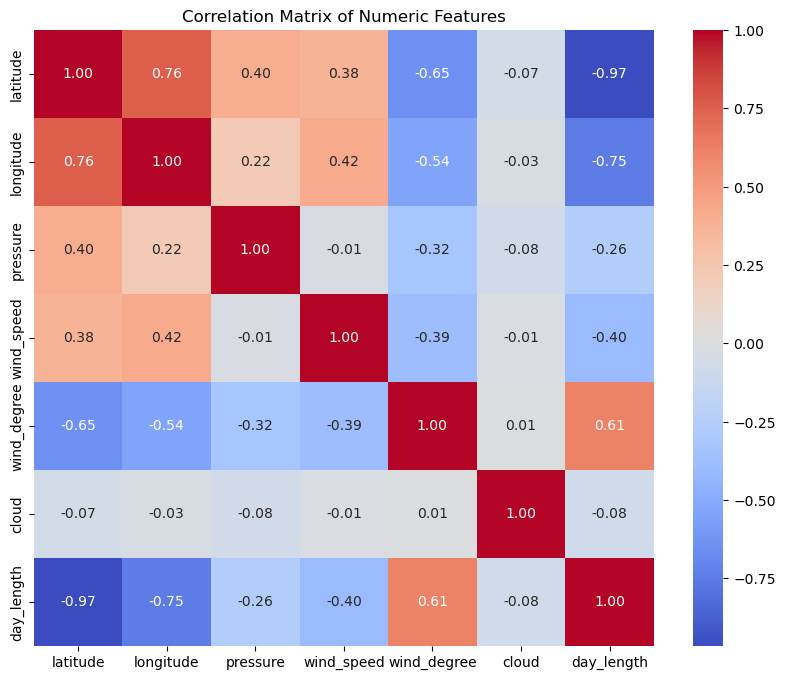

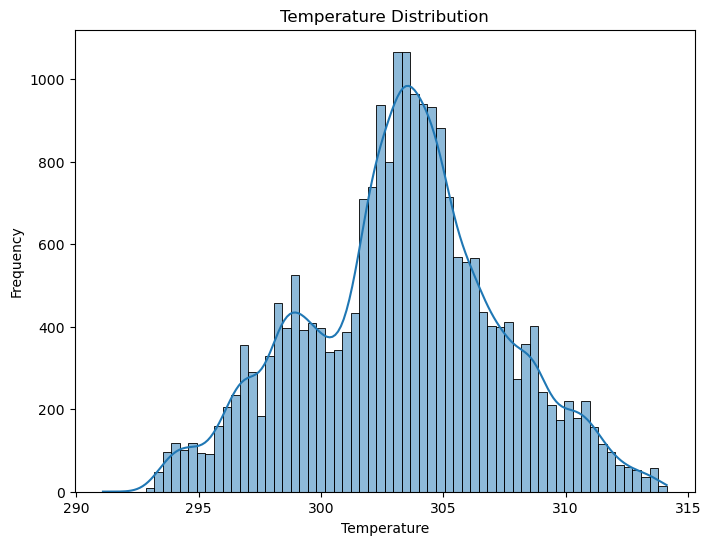

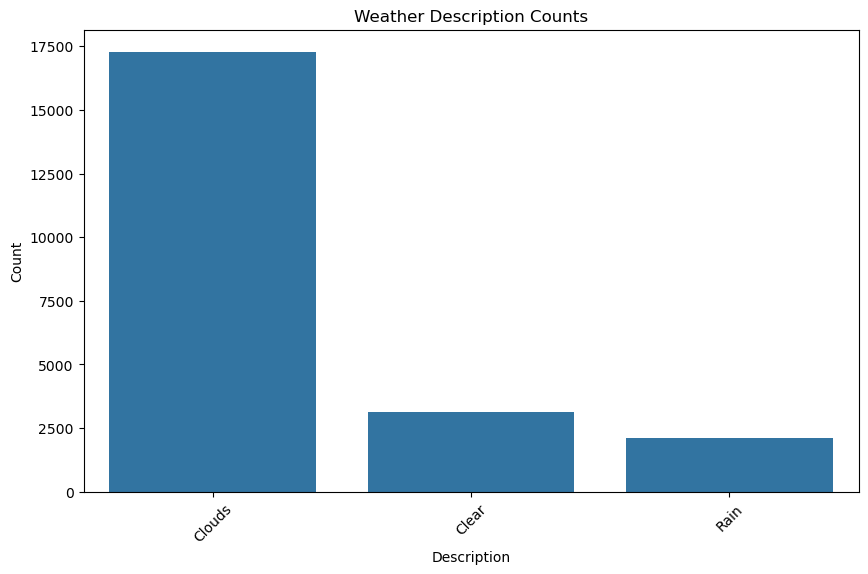


Next steps:
1. Create a preprocessing pipeline (e.g., handle missing values, encode categoricals, scale numerics).
2. Split the clean dataset into training and testing sets.
3. Train a RandomForestClassifier to predict 'description'.
4. Train a RandomForestRegressor to predict ['temp', 'humidity', 'wind_vector'].
5. Save the pipelines (using joblib) for later deployment (e.g., with Streamlit).



In [46]:
# -------------------------
# Step 1: Create Clean Dataset
# -------------------------

# List the desired columns for features and targets
features = ['latitude', 'longitude', 'pressure', 'wind_speed', 'wind_degree', 'cloud', 'day_length', 'date', 'urban_rural', 'region_new']
target_class = 'description'
target_reg = ['temp', 'humidity', 'wind_vector']

# Create a new DataFrame with the selected columns
clean_df = Nigeria_weather[features + [target_class] + target_reg].copy()

# Convert 'date' to datetime (if it's not already)
clean_df['date'] = pd.to_datetime(clean_df['date'])

# Optionally, you could extract additional time features here (e.g., month, day, etc.)

# -------------------------
# Step 2: Basic EDA
# -------------------------

print("Clean Dataset Shape:", clean_df.shape)
print("\nFirst 10 Rows:")
print(clean_df.head(10))

print("\nDataset Info:")
print(clean_df.info())

print("\nDescriptive Statistics:")
print(clean_df.describe(include='all'))

# -------------------------
# Step 3: Visual EDA
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a correlation matrix for the numeric features
numeric_cols = ['latitude', 'longitude', 'pressure', 'wind_speed', 'wind_degree', 'cloud', 'day_length']
corr_matrix = clean_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Example: Plot distribution of temperature (regression target)
plt.figure(figsize=(8, 6))
sns.histplot(clean_df['temp'], kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Example: Count plot for weather description (classification target)
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x=target_class, order=clean_df[target_class].value_counts().index)
plt.title("Weather Description Counts")
plt.xlabel("Description")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# Next Steps:
# -------------------------
print("""
Next steps:
1. Create a preprocessing pipeline (e.g., handle missing values, encode categoricals, scale numerics).
2. Split the clean dataset into training and testing sets.
3. Train a RandomForestClassifier to predict 'description'.
4. Train a RandomForestRegressor to predict ['temp', 'humidity', 'wind_vector'].
5. Save the pipelines (using joblib) for later deployment (e.g., with Streamlit).
""")


In [48]:
import numpy as np
import pandas as pd

# Assuming Nigeria_weather is your original DataFrame
# Step 1: Create the log-transformed cloud column
#Nigeria_weather['log_cloud'] = np.log1p(Nigeria_weather['cloud'])

# Step 2: Define the features and targets
features = ['latitude', 'longitude', 'pressure', 'wind_speed', 'wind_degree', 'day_length', 'urban_rural', 'region_new']
target_class = 'description'
target_reg = ['temp', 'humidity', 'wind_vector']


# You can then proceed with your preprocessing, splitting, and model training steps.


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib

# ---------------------------
# Define Feature and Target Columns
# ---------------------------
# Features: We use the following:
# - Geographical: latitude, longitude
# - Meteorological: pressure, wind_speed, wind_degree, log_cloud, day_length, date
# - Contextual: urban_rural, region_new
features= ['latitude', 'longitude', 'pressure', 'wind_speed', 'wind_degree','day_length','urban_rural', 'region_new']

# Targets:
target_class = 'description'  # classification target
target_reg = ['temp', 'humidity', 'wind_vector']  # regression targets

# ---------------------------
# Create the Clean Dataset
# ---------------------------
# Select only the desired columns (features + targets)
clean_df = Nigeria_weather[features + [target_class] + target_reg].copy()

# (Assumption: 'date' column is already converted to Unix timestamp and
# 'log_cloud' is computed from 'cloud' using np.log1p)
print("Clean dataset shape:", clean_df.shape)
#encode classification target
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
joblib.dump(le, 'label_encoder.pkl')

# ---------------------------
# Split the Data into Training and Testing Sets
# ---------------------------
# For classification
X = clean_df[features]
y_class = clean_df[target_class]
# For regression
y_reg = clean_df[target_reg]

# Use the same split for both tasks (if desired)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)

print("Classification training set shape:", X_train_class.shape)
print("Regression training set shape:", X_train_reg.shape)

# ---------------------------
# Build Preprocessing Pipeline
# ---------------------------
numeric_features = ['latitude', 'longitude', 'pressure', 'wind_speed', 'wind_degree','day_length']
categorical_features = ['urban_rural', 'region_new']

# Numeric pipeline: impute missing values and scale
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: impute missing values and one-hot encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# ---------------------------
# Build the Full Pipelines for Models
# ---------------------------
# Classification pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Regression pipeline
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# ---------------------------
# Train the Models
# ---------------------------
clf_pipeline.fit(X_train_class, y_train_class)
reg_pipeline.fit(X_train_reg, y_train_reg)

# ---------------------------
# Evaluate the Models
# ---------------------------
clf_score = clf_pipeline.score(X_test_class, y_test_class)
reg_score = reg_pipeline.score(X_test_reg, y_test_reg)

print("Classifier test accuracy:", clf_score)
print("Regressor test R^2:", reg_score)

# ---------------------------
# Save the Pipelines for Deployment
# ---------------------------
joblib.dump(clf_pipeline, 'classification_pipeline.pkl')
joblib.dump(reg_pipeline, 'regression_pipeline.pkl')

print("Pipelines saved successfully!")


Clean dataset shape: (22541, 12)


NameError: name 'y_class' is not defined

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
import joblib

# ---------------------------
# Define Feature and Target Columns
# ---------------------------
# Using our agreed features and targets:
features = ['latitude', 'longitude', 'pressure', 'wind_speed', 'wind_degree','day_length', 'date', 'urban_rural', 'region_new']

target_class = 'description'                # classification target (weather description)
target_reg = ['temp', 'humidity', 'wind_vector']  # regression targets

# ---------------------------
# Create the Clean Dataset
# ---------------------------
# Select only the desired columns (features + targets)
clean_df = Nigeria_weather[features + [target_class] + target_reg].copy()

# Ensure 'date' is converted to Unix timestamp (if not already done)
#clean_df['date'] = pd.to_datetime(clean_df['date']).astype('int64') // 10**9

# ---------------------------
# Encode the Classification Target
# ---------------------------
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
joblib.dump(le, 'label_encoder.pkl')

#le = LabelEncoder()
#clean_df[target_class] = le.fit_transform(clean_df[target_class])
# Now the classification target will be numeric (e.g., 0, 1, 2)

# ---------------------------
# Split the Data into Training and Testing Sets
# ---------------------------
X = clean_df[features]
y_class = clean_df[target_class]
y_reg = clean_df[target_reg]

# We'll use the same split for both tasks (70% training, 30% testing)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.3, random_state=42)

print("Classification training set shape:", X_train_class.shape)
print("Regression training set shape:", X_train_reg.shape)

# ---------------------------
# Build Preprocessing Pipeline
# ---------------------------
numeric_features = ['latitude', 'longitude', 'pressure', 'wind_speed', 'wind_degree','day_length']
categorical_features = ['urban_rural', 'region_new']

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# ---------------------------
# Build RandomForest Pipelines
# ---------------------------
rf_clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# ---------------------------
# Build XGBoost Pipelines
# ---------------------------
xgb_clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(n_estimators=100, random_state=42,
                                     use_label_encoder=False, eval_metric='logloss'))
])

xgb_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, random_state=42))
])

# ---------------------------
# Train the Models
# ---------------------------
print("Training RandomForest models...")
rf_clf_pipeline.fit(X_train_class, y_train_class)
rf_reg_pipeline.fit(X_train_reg, y_train_reg)

print("Training XGBoost models...")
xgb_clf_pipeline.fit(X_train_class, y_train_class)
xgb_reg_pipeline.fit(X_train_reg, y_train_reg)

# ---------------------------
# Evaluate the Models
# ---------------------------
rf_clf_score = rf_clf_pipeline.score(X_test_class, y_test_class)
rf_reg_score = rf_reg_pipeline.score(X_test_reg, y_test_reg)

xgb_clf_score = xgb_clf_pipeline.score(X_test_class, y_test_class)
xgb_reg_score = xgb_reg_pipeline.score(X_test_reg, y_test_reg)

print("RandomForest Classifier Accuracy:", rf_clf_score)
print("RandomForest Regressor R^2:", rf_reg_score)
print("XGBoost Classifier Accuracy:", xgb_clf_score)
print("XGBoost Regressor R^2:", xgb_reg_score)

# ---------------------------
# Save the Pipelines for Deployment
# ---------------------------
joblib.dump(rf_clf_pipeline, 'rf_classification_pipeline.pkl')
joblib.dump(rf_reg_pipeline, 'rf_regression_pipeline.pkl')
joblib.dump(xgb_clf_pipeline, 'xgb_classification_pipeline.pkl')
joblib.dump(xgb_reg_pipeline, 'xgb_regression_pipeline.pkl')

print("Pipelines saved successfully!")


ModuleNotFoundError: No module named 'xgboost'

In [54]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

# Define a 5-fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- RandomForest Models Cross-Validation ---

# For classification using RandomForest pipeline (rf_clf_pipeline)
rf_clf_cv_scores = cross_val_score(rf_clf_pipeline, X, y_class, cv=kf, scoring='accuracy')
# For regression using RandomForest pipeline (rf_reg_pipeline)
rf_reg_cv_scores = cross_val_score(rf_reg_pipeline, X, y_reg, cv=kf, scoring='r2')

print("RandomForest Classifier CV Accuracy: {:.4f}".format(np.mean(rf_clf_cv_scores)))
print("RandomForest Regressor CV R^2: {:.4f}".format(np.mean(rf_reg_cv_scores)))

# --- XGBoost Models Cross-Validation ---

# For classification using XGBoost pipeline (xgb_clf_pipeline)
xgb_clf_cv_scores = cross_val_score(xgb_clf_pipeline, X, y_class, cv=kf, scoring='accuracy')
# For regression using XGBoost pipeline (xgb_reg_pipeline)
xgb_reg_cv_scores = cross_val_score(xgb_reg_pipeline, X, y_reg, cv=kf, scoring='r2')

print("XGBoost Classifier CV Accuracy: {:.4f}".format(np.mean(xgb_clf_cv_scores)))
print("XGBoost Regressor CV R^2: {:.4f}".format(np.mean(xgb_reg_cv_scores)))


NameError: name 'rf_clf_pipeline' is not defined

In [56]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load your RandomForest classifier pipeline (assumed saved as 'rf_classification_pipeline.pkl')
rf_clf_pipeline = joblib.load('rf_classification_pipeline.pkl')

# Extract the preprocessor from the pipeline
preprocessor = rf_clf_pipeline.named_steps['preprocessor']

# Get the feature names output by the preprocessor (requires scikit-learn >=1.0)
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances from the classifier
importances = rf_clf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for display
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12,6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("RandomForest Classifier Feature Importance")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'rf_classification_pipeline.pkl'

In [23]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Load your RandomForest regression pipeline (assumed saved as 'rf_regression_pipeline.pkl')
rf_reg_pipeline = joblib.load('rf_regression_pipeline.pkl')

# Assume X_test_reg and y_test_reg are your regression test sets.
# Get predictions from the regression model
y_pred_reg = rf_reg_pipeline.predict(X_test_reg)

# For residual analysis, we'll focus on temperature (assumed to be the first column in y_reg)
# Ensure y_test_reg is a DataFrame (if it's a NumPy array, convert it accordingly)
if isinstance(y_test_reg, pd.DataFrame):
    actual_temp = y_test_reg.iloc[:, 0]
else:
    actual_temp = y_test_reg[:, 0]
pred_temp = y_pred_reg[:, 0]

# Compute residuals: actual temperature minus predicted temperature
residuals = actual_temp - pred_temp

# Calculate Mean Squared Error
mse = mean_squared_error(actual_temp, pred_temp)
print("Mean Squared Error (Temperature):", mse)

# Plot residual distribution
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution for Temperature Prediction")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Residuals vs Predicted Temperature
plt.figure(figsize=(10,6))
plt.scatter(pred_temp, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Temperature (Kelvin)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Temperature")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'rf_regression_pipeline.pkl'

In [25]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ---------------------------
# For the Classification Pipeline (RandomForest)
# ---------------------------
# Define hyperparameter grid for the RandomForestClassifier within your pipeline
param_grid_clf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Set up RandomizedSearchCV for classification pipeline
random_search_clf = RandomizedSearchCV(
    clf_pipeline,            # your previously defined pipeline
    param_distributions=param_grid_clf,
    n_iter=10,               # number of parameter settings sampled
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the classifier search on the training data
random_search_clf.fit(X_train_class, y_train_class)

print("Best RandomForest Classifier Parameters:")
print(random_search_clf.best_params_)
print("Best Classifier CV Accuracy: {:.4f}".format(random_search_clf.best_score_))

# ---------------------------
# For the Regression Pipeline (RandomForest)
# ---------------------------
# Define hyperparameter grid for the RandomForestRegressor within your pipeline
param_grid_reg = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Set up RandomizedSearchCV for regression pipeline
random_search_reg = RandomizedSearchCV(
    reg_pipeline,            # your previously defined pipeline
    param_distributions=param_grid_reg,
    n_iter=10,               # number of parameter settings sampled
    cv=5,                    # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit the regression search on the training data
random_search_reg.fit(X_train_reg, y_train_reg)

print("Best RandomForest Regressor Parameters:")
print(random_search_reg.best_params_)
print("Best Regressor CV R^2: {:.4f}".format(random_search_reg.best_score_))


NameError: name 'clf_pipeline' is not defined

In [27]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# ---------------------------
# Tune XGBoost Classifier
# ---------------------------
param_grid_xgb_clf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

xgb_clf_search = RandomizedSearchCV(
    xgb_clf_pipeline,            # Your XGBoost classifier pipeline
    param_distributions=param_grid_xgb_clf,
    n_iter=10,                   # Number of parameter settings to sample
    cv=5,                        # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

xgb_clf_search.fit(X_train_class, y_train_class)
print("Best XGBoost Classifier Parameters:")
print(xgb_clf_search.best_params_)
print("Best XGBoost Classifier CV Accuracy: {:.4f}".format(xgb_clf_search.best_score_))


# ---------------------------
# Tune XGBoost Regressor
# ---------------------------
param_grid_xgb_reg = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__subsample': [0.6, 0.8, 1.0]
}

xgb_reg_search = RandomizedSearchCV(
    xgb_reg_pipeline,            # Your XGBoost regressor pipeline
    param_distributions=param_grid_xgb_reg,
    n_iter=10,                   # Number of parameter settings to sample
    cv=5,                        # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

xgb_reg_search.fit(X_train_reg, y_train_reg)
print("Best XGBoost Regressor Parameters:")
print(xgb_reg_search.best_params_)
print("Best XGBoost Regressor CV R^2: {:.4f}".format(xgb_reg_search.best_score_))


NameError: name 'xgb_clf_pipeline' is not defined

In [40]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

st.title("Nigeria Weather Prediction")
st.header("Input Weather Data")

# --------------------------
# 1. Geopolitical Zone Selection
# --------------------------
zones = ["North-central", "North-east", "North-west", "South-east", "South-south", "South-west"]
selected_zone = st.selectbox("Select Geopolitical Zone", zones)

# --------------------------
# 2. Automated Coordinates Based on Zone
# --------------------------
zone_coordinates = {
    "North-central": {"latitude": 9.0765, "longitude": 7.3986},   # e.g., Abuja
    "North-east": {"latitude": 11.0000, "longitude": 13.0000},      # approximate
    "North-west": {"latitude": 12.0022, "longitude": 8.5919},       # e.g., Kano
    "South-east": {"latitude": 6.4491, "longitude": 7.5483},        # e.g., Enugu
    "South-south": {"latitude": 4.8156, "longitude": 7.0498},       # e.g., Port Harcourt
    "South-west": {"latitude": 6.5244, "longitude": 3.3792}         # e.g., Lagos
}

lat_default = zone_coordinates[selected_zone]["latitude"]
lon_default = zone_coordinates[selected_zone]["longitude"]

latitude = st.number_input("Latitude", value=lat_default, format="%.6f", disabled=True)
longitude = st.number_input("Longitude", value=lon_default, format="%.6f", disabled=True)

# Use the selected zone as region_new
region_new = selected_zone

# --------------------------
# 3. Urban/Rural Selection
# --------------------------
urban_rural = st.selectbox("Urban or Rural", ["Rural", "Urban"])

# --------------------------
# 4. Numeric Inputs for Other Features
# --------------------------
pressure = st.number_input("Pressure (hPa)", value=1012.0, format="%.2f")
wind_speed = st.number_input("Wind Speed (m/s)", value=5.5, format="%.2f")
wind_degree = st.number_input("Wind Degree (°)", value=180, format="%d")
day_length = st.number_input("Day Length (seconds)", value=43200, format="%d")

# --------------------------
# 5. Create Input DataFrame (without date)
# --------------------------
input_data = pd.DataFrame({
    'latitude': [latitude],
    'longitude': [longitude],
    'pressure': [pressure],
    'wind_speed': [wind_speed],
    'wind_degree': [wind_degree],
    'day_length': [day_length],
    'region_new': [region_new],
    'urban_rural': [urban_rural]
})

st.write("### Input Data Preview")
st.dataframe(input_data)

# --------------------------
# 6. Load Pre-trained RandomForest Pipelines
# --------------------------
try:
    clf_pipeline = joblib.load('rf_classification_pipeline.pkl')
    reg_pipeline = joblib.load('rf_regression_pipeline.pkl')
    st.success("Models loaded successfully!")
except Exception as e:
    st.error("Error loading models: " + str(e))
    st.stop()

# --------------------------
# 7. Make Predictions
# --------------------------
if st.button("Predict"):
    try:
        # Predict weather description (classification)
        class_pred = clf_pipeline.predict(input_data)[0]

        # Predict temperature, humidity, wind_vector (regression)
        reg_pred = reg_pipeline.predict(input_data)[0]
        # Convert temperature from Kelvin to Celsius
        temp_celsius = reg_pred[0] - 273.15

        st.subheader("Predictions")
        st.write("Weather Description:", class_pred)
        st.write(f"Temperature: {temp_celsius:.2f} °C")
        st.write(f"Humidity: {reg_pred[1]:.2f} %")
        st.write(f"Wind Vector: {reg_pred[2]:.2f} m/s")
    except Exception as e:
        st.error("Error during prediction: " + str(e))


Overwriting app.py


In [29]:
!pip install streamlit pyngrok joblib


In [42]:
!streamlit run app.py &>/dev/null &


In [30]:
!ngrok config add-authtoken 2tOpewlTWatqonO29eIwqfChHJF_6ebkU8tRBSGWbB6oxzcSo


                                                                                                    
Installing ngrok ... 
                                                                                                    
Authtoken saved to configuration file: C:\Users\Administrator\AppData\Local/ngrok/ngrok.yml


In [2]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://f49918c0f97b.ngrok-free.app" -> "http://localhost:8501">